In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# preprocessing

data = pd.read_csv('data/TitanicDataSet.csv')
data = data.loc[:,~(data.columns.str.contains('zero'))]
data = data.dropna(axis=0)

X = data.drop(columns=['2urvived'])
y = data['2urvived']

train, test = train_test_split(data, test_size=0.2, random_state=42)

x_test, y_test = test.drop(columns=['2urvived']), test['2urvived']

In [10]:
def predictLabel(train, model):
    '''
    fit data to model
    '''
    train = train.dropna(axis=0)
    x_train, y_train = train.drop(columns=['2urvived']), train['2urvived']


    # log_reg = LogisticRegression(max_iter=500)
    log_reg = model
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # class_report = classification_report(y_test, y_pred)

    return accuracy

In [11]:

# Function to randomly replace values with NaN
def introduce_nan(df, nan_fraction):

    df = df.copy()

    total_values = df.size
    num_nan = int(total_values * nan_fraction)
    

    # Get a random sample of positions to replace with NaN
    nan_indices = np.random.choice(df.size, num_nan, replace=False)
    
    # Convert the flat indices to multi-dimensional indices
    multi_indices = np.unravel_index(nan_indices, df.shape)

    for x, y in zip(multi_indices[0], multi_indices[1]):
        df.iloc[x, y] = np.nan

    return df


In [12]:
accuracy = pd.DataFrame(columns=['missingPercent', 'accuracyLogisticRegression', 'accuracyKNeighborsClassifier'])

for i in np.arange(0, 0.8, 0.01):
    try:
        mtrain = introduce_nan(train, i)
        accuracy.loc[accuracy.shape[0]] = [i, predictLabel(mtrain, LogisticRegression(max_iter=500)), predictLabel(mtrain, KNeighborsClassifier())]
    except:
        print('less than two row')
        break
accuracy

/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

less than two row


,missingPercent,accuracyLogisticRegression,accuracyKNeighborsClassifier
0,0.00,0.828244,0.729008
1,0.01,0.835878,0.729008
2,0.02,0.839695,0.740458
3,0.03,0.847328,0.744275
4,0.04,0.851145,0.744275
5,0.05,0.843511,0.706107
6,0.06,0.847328,0.755725
7,0.07,0.835878,0.713740
8,0.08,0.843511,0.729008
9,0.09,0.828244,0.732824


<AxesSubplot:xlabel='missingPercent'>

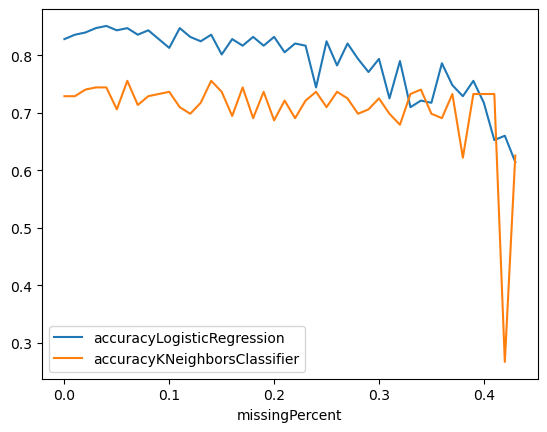

In [13]:
accuracy.plot(kind='line', x='missingPercent', y=['accuracyLogisticRegression', 'accuracyKNeighborsClassifier'])